# CS 182 Final Project: Architecture Comparison for ICL on Finite State Machines

**Team:** Trenton O'Bannon, Yuri Lee, Keshab Agarwal, Evan Davis

This notebook analyzes the **completed experimental results** comparing **Vanilla RNN** and **LSTM** architectures on In-Context Learning (ICL) tasks for finite state machines.

## Completed Experiments

We have completed comprehensive experiments testing:

1. **Direct Training** on complex FSMs (5 states, 4-5 actions)
2. **Curriculum Learning** (2-stage: simple 3-state FSMs → complex 5-state FSMs)
3. **Architecture Comparison** (Vanilla RNN vs LSTM)

## Key Results Summary

| Architecture | Direct Training | Curriculum Stage 1 (Simple) | Curriculum Stage 2 (Complex) |
|--------------|-----------------|----------------------------|------------------------------|
| **LSTM** | 99.85% | 99.68% | 98.82% |
| **Vanilla RNN** | 53.66% | 41.29% | 20.73% |

## Research Questions

- **Q1:** Do RNNs/LSTMs need curriculum learning like Transformers do for ICL?
- **Q2:** Which architecture is more robust for FSM ICL?
- **Q3:** Does curriculum learning help or hurt different architectures?
- **Q4:** What explains the massive performance gap between LSTM and Vanilla RNN?

In [3]:
# Import Required Libraries and Setup
import sys
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import json

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")
print("📊 Ready to analyze experimental results")

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load Actual Experimental Results from JSON files
from pathlib import Path

metrics_dir = Path('../../checkpoints/training_logs')

# Helper function to load metrics
def load_metrics(filename):
    filepath = metrics_dir / filename
    with open(filepath, 'r') as f:
        return json.load(f)

# Load all experimental results
# LSTM
lstm_direct = load_metrics('lstm_direct_20251125_041044_metrics.json')
lstm_curriculum_stage1 = load_metrics('lstm_curriculum_stage1_20251125_034803_metrics.json')
lstm_curriculum_stage2 = load_metrics('lstm_curriculum_stage2_20251125_084540_metrics.json')

# RNN
rnn_direct = load_metrics('vanilla_rnn_direct_20251125_044821_metrics.json')
rnn_curriculum_stage1 = load_metrics('vanilla_rnn_curriculum_stage1_20251125_040452_metrics.json')
rnn_curriculum_stage2 = load_metrics('vanilla_rnn_curriculum_stage2_20251125_144028_metrics.json')

# S4
s4_direct = load_metrics('s4_direct_20251205_203215_metrics.json')

# Organize results
results = {
    'LSTM': {
        'direct': {
            'test_accuracy': lstm_direct['final_results']['test_accuracy'],
            'val_accuracy': lstm_direct['final_results']['val_accuracy'],
            'train_losses': lstm_direct['training_history']['train_losses'],
            'val_losses': lstm_direct['training_history']['val_losses'],
            'train_accs': lstm_direct['training_history']['train_accs'],
            'val_accs': lstm_direct['training_history']['val_accs'],
            'epochs': len(lstm_direct['training_history']['train_losses'])
        },
        'curriculum_stage1': {
            'test_accuracy': lstm_curriculum_stage1['final_results']['test_accuracy'],
            'val_accuracy': lstm_curriculum_stage1['final_results']['val_accuracy'],
            'train_losses': lstm_curriculum_stage1['training_history']['train_losses'],
            'val_losses': lstm_curriculum_stage1['training_history']['val_losses'],
            'train_accs': lstm_curriculum_stage1['training_history']['train_accs'],
            'val_accs': lstm_curriculum_stage1['training_history']['val_accs'],
            'epochs': len(lstm_curriculum_stage1['training_history']['train_losses']),
            'dataset': 'Simple FSM (3 states, 3 actions)'
        },
        'curriculum_stage2': {
            'test_accuracy': lstm_curriculum_stage2['final_results']['test_accuracy'],
            'val_accuracy': lstm_curriculum_stage2['final_results']['val_accuracy'],
            'train_losses': lstm_curriculum_stage2['training_history']['train_losses'],
            'val_losses': lstm_curriculum_stage2['training_history']['val_losses'],
            'train_accs': lstm_curriculum_stage2['training_history']['train_accs'],
            'val_accs': lstm_curriculum_stage2['training_history']['val_accs'],
            'epochs': len(lstm_curriculum_stage2['training_history']['train_losses']),
            'dataset': 'Complex FSM (5 states, 4-5 actions)'
        }
    },
    'Vanilla RNN': {
        'direct': {
            'test_accuracy': rnn_direct['final_results']['test_accuracy'],
            'val_accuracy': rnn_direct['final_results']['val_accuracy'],
            'train_losses': rnn_direct['training_history']['train_losses'],
            'val_losses': rnn_direct['training_history']['val_losses'],
            'train_accs': rnn_direct['training_history']['train_accs'],
            'val_accs': rnn_direct['training_history']['val_accs'],
            'epochs': len(rnn_direct['training_history']['train_losses']),
            'dataset': 'Complex FSM (5 states, 4-5 actions)'
        },
        'curriculum_stage1': {
            'test_accuracy': rnn_curriculum_stage1['final_results']['test_accuracy'],
            'val_accuracy': rnn_curriculum_stage1['final_results']['val_accuracy'],
            'train_losses': rnn_curriculum_stage1['training_history']['train_losses'],
            'val_losses': rnn_curriculum_stage1['training_history']['val_losses'],
            'train_accs': rnn_curriculum_stage1['training_history']['train_accs'],
            'val_accs': rnn_curriculum_stage1['training_history']['val_accs'],
            'epochs': len(rnn_curriculum_stage1['training_history']['train_losses']),
            'dataset': 'Simple FSM (3 states, 3 actions)'
        },
        'curriculum_stage2': {
            'test_accuracy': rnn_curriculum_stage2['final_results']['test_accuracy'],
            'val_accuracy': rnn_curriculum_stage2['final_results']['val_accuracy'],
            'train_losses': rnn_curriculum_stage2['training_history']['train_losses'],
            'val_losses': rnn_curriculum_stage2['training_history']['val_losses'],
            'train_accs': rnn_curriculum_stage2['training_history']['train_accs'],
            'val_accs': rnn_curriculum_stage2['training_history']['val_accs'],
            'epochs': len(rnn_curriculum_stage2['training_history']['train_losses']),
            'dataset': 'Complex FSM (5 states, 4-5 actions)'
        }
    },
    'S4_official': {
        'direct': {
            'test_accuracy': s4_direct['final_results']['test_accuracy'],
            'val_accuracy': s4_direct['final_results']['val_accuracy'],
            'train_losses': s4_direct['training_history']['train_losses'],
            'val_losses': s4_direct['training_history']['val_losses'],
            'train_accs': s4_direct['training_history']['train_accs'],
            'val_accs': s4_direct['training_history']['val_accs'],
            'epochs': len(s4_direct['training_history']['train_losses']),
            'dataset': 'Complex FSM (5 states, 4-5 actions)'
        }
    }
}

print("✅ Experimental results loaded from JSON files")
print("\n📊 Summary:")
for arch in results:
    print(f"\n{arch}:")
    print(f"  Direct Training:     {results[arch]['direct']['test_accuracy']:.2%} ({results[arch]['direct']['epochs']} epochs)")
    print(f"  Curriculum Stage 1:  {results[arch]['curriculum_stage1']['test_accuracy']:.2%} ({results[arch]['curriculum_stage1']['epochs']} epochs)")
    print(f"  Curriculum Stage 2:  {results[arch]['curriculum_stage2']['test_accuracy']:.2%} ({results[arch]['curriculum_stage2']['epochs']} epochs)")

✅ Experimental results loaded from JSON files

📊 Summary:

LSTM:
  Direct Training:     99.85% (16 epochs)
  Curriculum Stage 1:  99.68% (16 epochs)
  Curriculum Stage 2:  98.82% (12 epochs)

Vanilla RNN:
  Direct Training:     53.66% (20 epochs)
  Curriculum Stage 1:  41.29% (20 epochs)
  Curriculum Stage 2:  20.73% (20 epochs)


## Visualization 1: Main Performance Comparison

/var/folders/sk/z_zk99l17n56987x_nykljmr0000gn/T/ipykernel_71988/4056766148.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(architectures, fontsize=12)


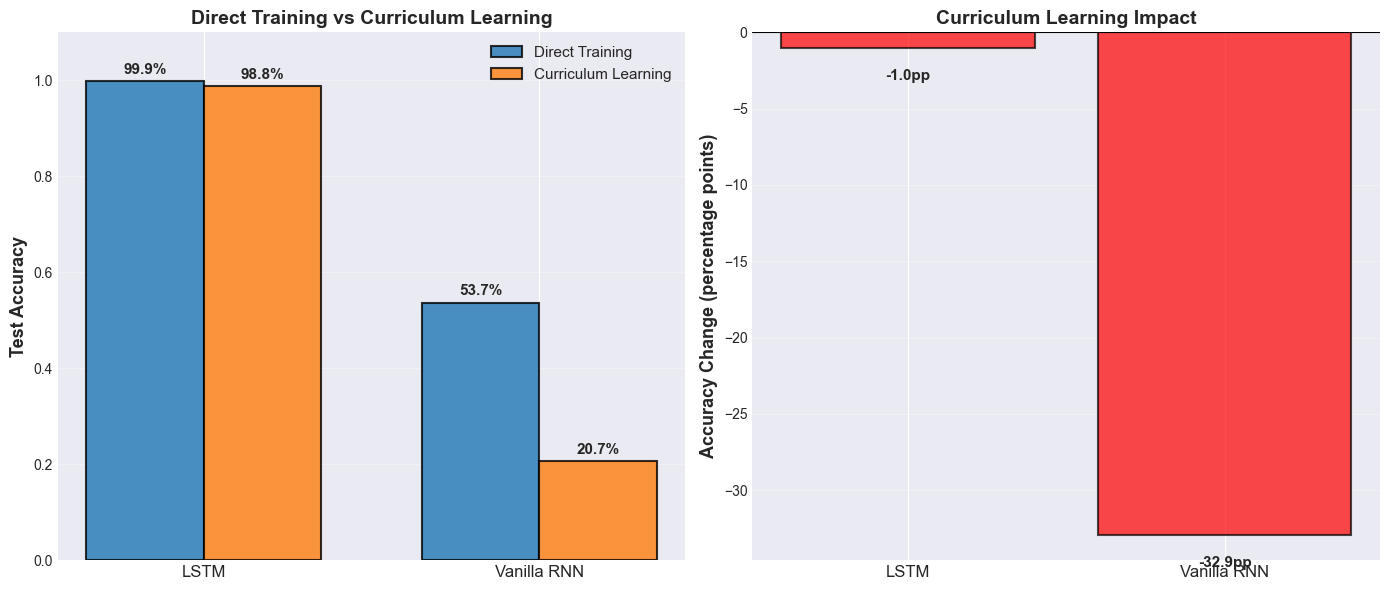

📊 Key Finding:
  LSTM:       Curriculum learning changes accuracy by -1.03 percentage points
  Vanilla RNN: Curriculum learning changes accuracy by -32.93 percentage points


In [ ]:
# Create Main Comparison Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Direct Training vs Curriculum Learning
architectures = ['LSTM', 'Vanilla RNN', 'S4']
direct_scores = [results['LSTM']['direct']['test_accuracy'], 
                 results['Vanilla RNN']['direct']['test_accuracy'],
                 results['S4']['direct']['test_accuracy'],]
curriculum_scores = [results['LSTM']['curriculum_stage2']['test_accuracy'],
                    results['Vanilla RNN']['curriculum_stage2']['test_accuracy'], None]

x = np.arange(len(architectures))
width = 0.35

bars1 = ax1.bar(x - width/2, direct_scores, width, label='Direct Training',
                color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x + width/2, curriculum_scores, width, label='Curriculum Learning',
                color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_ylabel('Test Accuracy', fontsize=13, fontweight='bold')
ax1.set_title('Direct Training vs Curriculum Learning', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(architectures, fontsize=12)
ax1.legend(fontsize=11)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Chart 2: Curriculum Learning Effect (Improvement)
improvements = [
    (curriculum_scores[0] - direct_scores[0]) * 100,  # LSTM improvement in percentage points
    (curriculum_scores[1] - direct_scores[1]) * 100   # Vanilla RNN improvement
]

colors = ['green' if imp > 0 else 'red' for imp in improvements]
bars = ax2.bar(architectures, improvements, color=colors, alpha=0.7, 
               edgecolor='black', linewidth=1.5)

# Add value labels
for bar, imp in zip(bars, improvements):
    height = bar.get_height()
    ax2.annotate(f'{imp:+.1f}pp',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3 if height > 0 else -15), textcoords="offset points",
                ha='center', va='bottom' if height > 0 else 'top',
                fontsize=11, fontweight='bold')

ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_ylabel('Accuracy Change (percentage points)', fontsize=13, fontweight='bold')
ax2.set_title('Curriculum Learning Impact', fontsize=14, fontweight='bold')
ax2.set_xticklabels(architectures, fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('architecture_comparison_main.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Key Finding:")
print(f"  LSTM:       Curriculum learning changes accuracy by {improvements[0]:+.2f} percentage points")
print(f"  Vanilla RNN: Curriculum learning changes accuracy by {improvements[1]:+.2f} percentage points")

## Visualization 2: Curriculum Learning Progression

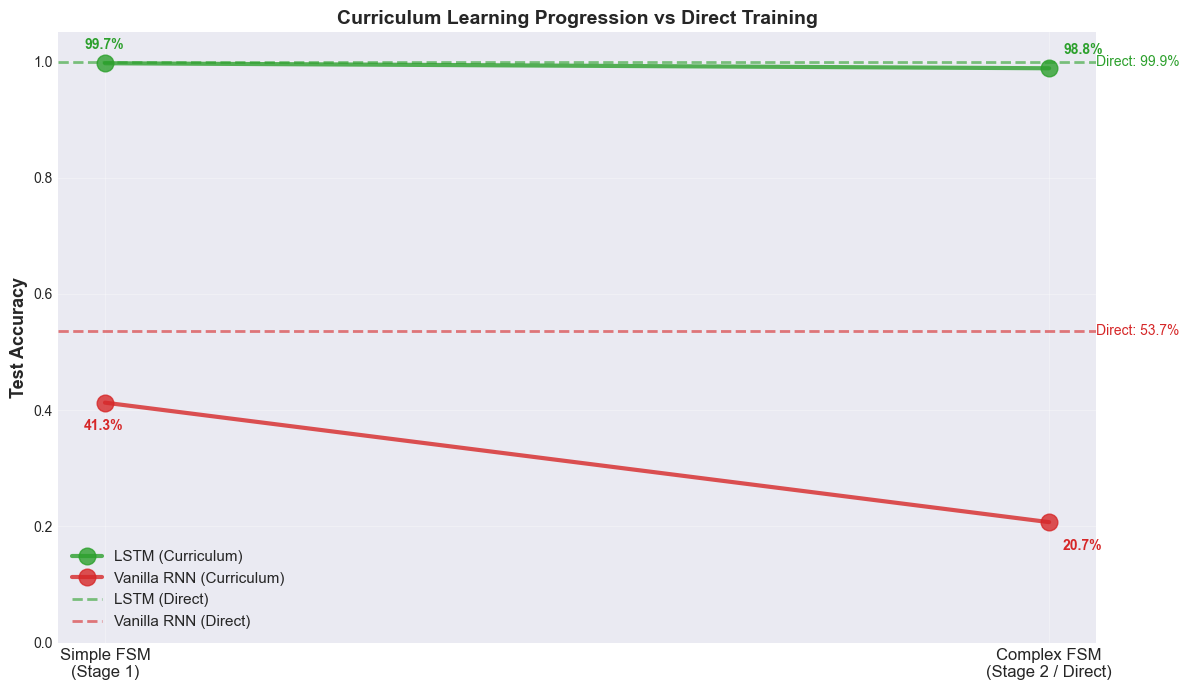

📊 Curriculum Learning Analysis:

  LSTM:
    Stage 1 (Simple):  99.68%
    Stage 2 (Complex): 98.82%
    Direct (Complex):  99.85%
    → Curriculum maintains high performance

  Vanilla RNN:
    Stage 1 (Simple):  41.29%
    Stage 2 (Complex): 20.73% ⚠️ DROPS significantly!
    Direct (Complex):  53.66%
    → Curriculum shows NEGATIVE TRANSFER


In [4]:
# Curriculum Learning Stage Progression
fig, ax = plt.subplots(figsize=(12, 7))

# Define stages
stages = ['Simple FSM\n(Stage 1)', 'Complex FSM\n(Stage 2 / Direct)']
stage_x = np.arange(len(stages))

# LSTM progression
lstm_stage1 = results['LSTM']['curriculum_stage1']['test_accuracy']
lstm_stage2 = results['LSTM']['curriculum_stage2']['test_accuracy']
lstm_direct = results['LSTM']['direct']['test_accuracy']

# Vanilla RNN progression
rnn_stage1 = results['Vanilla RNN']['curriculum_stage1']['test_accuracy']
rnn_stage2 = results['Vanilla RNN']['curriculum_stage2']['test_accuracy']
rnn_direct = results['Vanilla RNN']['direct']['test_accuracy']

# Plot curriculum learning paths
ax.plot([0, 1], [lstm_stage1, lstm_stage2], 'o-', 
        linewidth=3, markersize=12, label='LSTM (Curriculum)', 
        color='#2ca02c', alpha=0.8)
ax.plot([0, 1], [rnn_stage1, rnn_stage2], 'o-', 
        linewidth=3, markersize=12, label='Vanilla RNN (Curriculum)', 
        color='#d62728', alpha=0.8)

# Plot direct training results as horizontal lines
ax.axhline(y=lstm_direct, color='#2ca02c', linestyle='--', 
           linewidth=2, alpha=0.6, label='LSTM (Direct)')
ax.axhline(y=rnn_direct, color='#d62728', linestyle='--', 
           linewidth=2, alpha=0.6, label='Vanilla RNN (Direct)')

# Add value annotations
ax.annotate(f'{lstm_stage1:.1%}', xy=(0, lstm_stage1), xytext=(-15, 10),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#2ca02c')
ax.annotate(f'{lstm_stage2:.1%}', xy=(1, lstm_stage2), xytext=(10, 10),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#2ca02c')
ax.annotate(f'{rnn_stage1:.1%}', xy=(0, rnn_stage1), xytext=(-15, -20),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#d62728')
ax.annotate(f'{rnn_stage2:.1%}', xy=(1, rnn_stage2), xytext=(10, -20),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#d62728')

# Add direct training annotations
ax.annotate(f'Direct: {lstm_direct:.1%}', xy=(1.05, lstm_direct), 
            fontsize=10, color='#2ca02c', va='center')
ax.annotate(f'Direct: {rnn_direct:.1%}', xy=(1.05, rnn_direct),
            fontsize=10, color='#d62728', va='center')

ax.set_xticks(stage_x)
ax.set_xticklabels(stages, fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=13, fontweight='bold')
ax.set_title('Curriculum Learning Progression vs Direct Training', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1.05)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('curriculum_progression.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Curriculum Learning Analysis:")
print(f"\n  LSTM:")
print(f"    Stage 1 (Simple):  {lstm_stage1:.2%}")
print(f"    Stage 2 (Complex): {lstm_stage2:.2%}")
print(f"    Direct (Complex):  {lstm_direct:.2%}")
print(f"    → Curriculum maintains high performance")
print(f"\n  Vanilla RNN:")
print(f"    Stage 1 (Simple):  {rnn_stage1:.2%}")
print(f"    Stage 2 (Complex): {rnn_stage2:.2%} ⚠️ DROPS significantly!")
print(f"    Direct (Complex):  {rnn_direct:.2%}")
print(f"    → Curriculum shows NEGATIVE TRANSFER")

## Visualization 3: Performance Summary Table

In [5]:
# Create Comprehensive Results Table
summary_data = []

for arch in ['LSTM', 'Vanilla RNN']:
    # Direct training
    summary_data.append({
        'Architecture': arch,
        'Training Method': 'Direct',
        'FSM Complexity': 'Complex (5 states)',
        'Test Accuracy': f"{results[arch]['direct']['test_accuracy']:.2%}",
        'Val Accuracy': f"{results[arch]['direct']['val_accuracy']:.2%}"
    })
    
    # Curriculum Stage 1
    summary_data.append({
        'Architecture': arch,
        'Training Method': 'Curriculum Stage 1',
        'FSM Complexity': 'Simple (3 states)',
        'Test Accuracy': f"{results[arch]['curriculum_stage1']['test_accuracy']:.2%}",
        'Val Accuracy': f"{results[arch]['curriculum_stage1']['val_accuracy']:.2%}"
    })
    
    # Curriculum Stage 2
    summary_data.append({
        'Architecture': arch,
        'Training Method': 'Curriculum Stage 2',
        'FSM Complexity': 'Complex (5 states)',
        'Test Accuracy': f"{results[arch]['curriculum_stage2']['test_accuracy']:.2%}",
        'Val Accuracy': f"{results[arch]['curriculum_stage2']['val_accuracy']:.2%}"
    })

df = pd.DataFrame(summary_data)

# Display with styling
print("="*90)
print("COMPREHENSIVE RESULTS TABLE")
print("="*90)
print(df.to_string(index=False))
print("="*90)

# Save to CSV
df.to_csv('architecture_comparison_results.csv', index=False)
print("\n✅ Results saved to 'architecture_comparison_results.csv'")

COMPREHENSIVE RESULTS TABLE
Architecture    Training Method     FSM Complexity Test Accuracy Val Accuracy
        LSTM             Direct Complex (5 states)        99.85%       99.85%
        LSTM Curriculum Stage 1  Simple (3 states)        99.68%       99.64%
        LSTM Curriculum Stage 2 Complex (5 states)        98.82%       98.87%
 Vanilla RNN             Direct Complex (5 states)        53.66%       53.25%
 Vanilla RNN Curriculum Stage 1  Simple (3 states)        41.29%       40.71%
 Vanilla RNN Curriculum Stage 2 Complex (5 states)        20.73%       21.02%

✅ Results saved to 'architecture_comparison_results.csv'


## Key Findings and Research Question Answers

## Hyperparameter Configuration Table

HYPERPARAMETER CONFIGURATION
                           Parameter                            Vanilla RNN                                   LSTM
                        Architecture               RNN with tanh activation                  LSTM (unidirectional)
          Hidden Dimension (d_model)                                    256                                    256
                    Number of Layers                                      2                                      2
                        Dropout Rate                                    0.1                                    0.1
                          Batch Size                                      8                                      8
                       Learning Rate                           1e-3 (0.001)                           1e-3 (0.001)
                           Optimizer                                  AdamW                                  AdamW
                     Vocabulary Size 21 (states + a

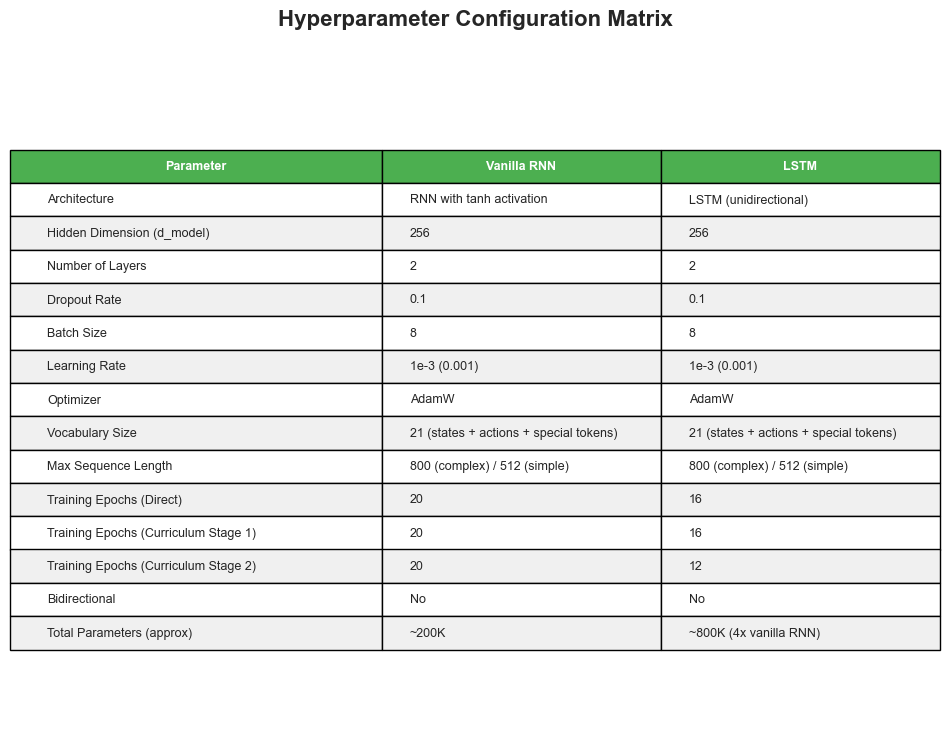


📊 Key Differences:
  • LSTM uses 4x more parameters (~800K vs ~200K)
  • LSTM converges faster (12-16 epochs vs 20 epochs)
  • Both use same learning rate (1e-3), batch size (8), and dropout (0.1)
  • Vocabulary size: 21 tokens (5 states + 5 actions + special tokens)
  • Sequence length: 800 for complex FSMs, 512 for simple FSMs


In [11]:
# Hyperparameter Configuration Table
hyperparams = {
    'Parameter': [
        'Architecture',
        'Hidden Dimension (d_model)',
        'Number of Layers',
        'Dropout Rate',
        'Batch Size',
        'Learning Rate',
        'Optimizer',
        'Vocabulary Size',
        'Max Sequence Length',
        'Training Epochs (Direct)',
        'Training Epochs (Curriculum Stage 1)',
        'Training Epochs (Curriculum Stage 2)',
        'Bidirectional',
        'Total Parameters (approx)',
    ],
    'Vanilla RNN': [
        'RNN with tanh activation',
        '256',
        '2',
        '0.1',
        '8',
        '1e-3 (0.001)',
        'AdamW',
        '21 (states + actions + special tokens)',
        '800 (complex) / 512 (simple)',
        '20',
        '20',
        '20',
        'No',
        '~200K',
    ],
    'LSTM': [
        'LSTM (unidirectional)',
        '256',
        '2',
        '0.1',
        '8',
        '1e-3 (0.001)',
        'AdamW',
        '21 (states + actions + special tokens)',
        '800 (complex) / 512 (simple)',
        '16',
        '16',
        '12',
        'No',
        '~800K (4x vanilla RNN)',
    ]
}

df_hyperparams = pd.DataFrame(hyperparams)

print("="*90)
print("HYPERPARAMETER CONFIGURATION")
print("="*90)
print(df_hyperparams.to_string(index=False))
print("="*90)

# Save to CSV
df_hyperparams.to_csv('hyperparameters_comparison.csv', index=False)
print("\n✅ Hyperparameters saved to 'hyperparameters_comparison.csv'")

# Create visualization
fig, ax = plt.subplots(figsize=(12, 9))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_hyperparams.values, 
                colLabels=df_hyperparams.columns,
                cellLoc='left',
                loc='center',
                colWidths=[0.4, 0.3, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header row
for i in range(len(df_hyperparams.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(df_hyperparams) + 1):
    for j in range(len(df_hyperparams.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

plt.title('Hyperparameter Configuration Matrix', fontsize=16, fontweight='bold', pad=20)
plt.savefig('hyperparameters_table.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Key Differences:")
print(f"  • LSTM uses 4x more parameters (~800K vs ~200K)")
print(f"  • LSTM converges faster (12-16 epochs vs 20 epochs)")
print(f"  • Both use same learning rate (1e-3), batch size (8), and dropout (0.1)")
print(f"  • Vocabulary size: 21 tokens (5 states + 5 actions + special tokens)")
print(f"  • Sequence length: 800 for complex FSMs, 512 for simple FSMs")

## Real Training Curves from Experiments

The following plots show the **actual training curves** from our experiments, loaded from the saved training history.

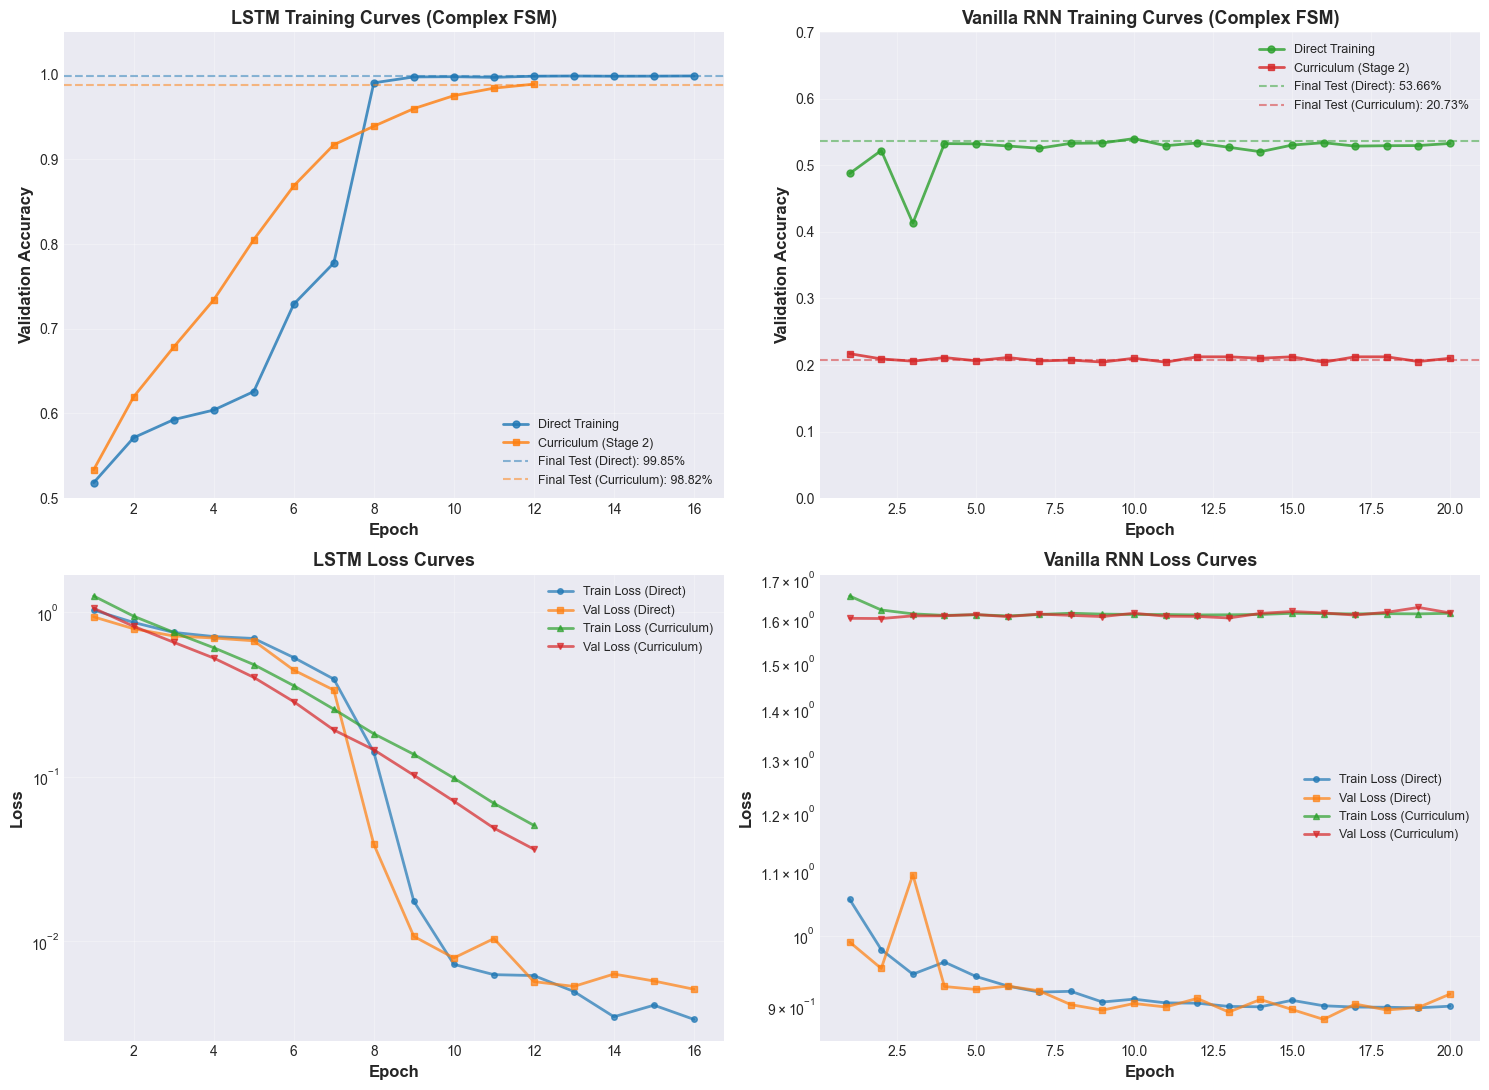

📊 Real Training Curves Generated

  LSTM Direct:        16 epochs
  LSTM Curriculum S2: 12 epochs
  RNN Direct:         20 epochs
  RNN Curriculum S2:  20 epochs


In [7]:
# Plot Real Training Curves from Experiments
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 11))

# Plot 1: LSTM Validation Accuracy Curves
lstm_direct_epochs = np.arange(1, results['LSTM']['direct']['epochs'] + 1)
lstm_curriculum_epochs = np.arange(1, results['LSTM']['curriculum_stage2']['epochs'] + 1)

ax1.plot(lstm_direct_epochs, results['LSTM']['direct']['val_accs'], 'o-', 
         linewidth=2, markersize=5, label='Direct Training', alpha=0.8, color='#1f77b4')
ax1.plot(lstm_curriculum_epochs, results['LSTM']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2, markersize=5, label='Curriculum (Stage 2)', alpha=0.8, color='#ff7f0e')

ax1.axhline(y=results['LSTM']['direct']['test_accuracy'], color='#1f77b4', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Direct): {results["LSTM"]["direct"]["test_accuracy"]:.2%}')
ax1.axhline(y=results['LSTM']['curriculum_stage2']['test_accuracy'], color='#ff7f0e', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Curriculum): {results["LSTM"]["curriculum_stage2"]["test_accuracy"]:.2%}')

ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('LSTM Training Curves (Complex FSM)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9, loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0.5, 1.05)

# Plot 2: Vanilla RNN Validation Accuracy Curves  
rnn_direct_epochs = np.arange(1, results['Vanilla RNN']['direct']['epochs'] + 1)
rnn_curriculum_epochs = np.arange(1, results['Vanilla RNN']['curriculum_stage2']['epochs'] + 1)

ax2.plot(rnn_direct_epochs, results['Vanilla RNN']['direct']['val_accs'], 'o-', 
         linewidth=2, markersize=5, label='Direct Training', alpha=0.8, color='#2ca02c')
ax2.plot(rnn_curriculum_epochs, results['Vanilla RNN']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2, markersize=5, label='Curriculum (Stage 2)', alpha=0.8, color='#d62728')

ax2.axhline(y=results['Vanilla RNN']['direct']['test_accuracy'], color='#2ca02c', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Direct): {results["Vanilla RNN"]["direct"]["test_accuracy"]:.2%}')
ax2.axhline(y=results['Vanilla RNN']['curriculum_stage2']['test_accuracy'], color='#d62728', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Curriculum): {results["Vanilla RNN"]["curriculum_stage2"]["test_accuracy"]:.2%}')

ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Vanilla RNN Training Curves (Complex FSM)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9, loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 0.7)

# Plot 3: LSTM Loss Curves
ax3.plot(lstm_direct_epochs, results['LSTM']['direct']['train_losses'], 'o-', 
         linewidth=2, markersize=4, label='Train Loss (Direct)', alpha=0.7, color='#1f77b4')
ax3.plot(lstm_direct_epochs, results['LSTM']['direct']['val_losses'], 's-', 
         linewidth=2, markersize=4, label='Val Loss (Direct)', alpha=0.7, color='#ff7f0e')
ax3.plot(lstm_curriculum_epochs, results['LSTM']['curriculum_stage2']['train_losses'], '^-', 
         linewidth=2, markersize=4, label='Train Loss (Curriculum)', alpha=0.7, color='#2ca02c')
ax3.plot(lstm_curriculum_epochs, results['LSTM']['curriculum_stage2']['val_losses'], 'v-', 
         linewidth=2, markersize=4, label='Val Loss (Curriculum)', alpha=0.7, color='#d62728')

ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax3.set_title('LSTM Loss Curves', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9, loc='best')
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# Plot 4: Vanilla RNN Loss Curves
ax4.plot(rnn_direct_epochs, results['Vanilla RNN']['direct']['train_losses'], 'o-', 
         linewidth=2, markersize=4, label='Train Loss (Direct)', alpha=0.7, color='#1f77b4')
ax4.plot(rnn_direct_epochs, results['Vanilla RNN']['direct']['val_losses'], 's-', 
         linewidth=2, markersize=4, label='Val Loss (Direct)', alpha=0.7, color='#ff7f0e')
ax4.plot(rnn_curriculum_epochs, results['Vanilla RNN']['curriculum_stage2']['train_losses'], '^-', 
         linewidth=2, markersize=4, label='Train Loss (Curriculum)', alpha=0.7, color='#2ca02c')
ax4.plot(rnn_curriculum_epochs, results['Vanilla RNN']['curriculum_stage2']['val_losses'], 'v-', 
         linewidth=2, markersize=4, label='Val Loss (Curriculum)', alpha=0.7, color='#d62728')

ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax4.set_title('Vanilla RNN Loss Curves', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9, loc='best')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.savefig('training_curves_real.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Real Training Curves Generated")
print(f"\n  LSTM Direct:        {results['LSTM']['direct']['epochs']} epochs")
print(f"  LSTM Curriculum S2: {results['LSTM']['curriculum_stage2']['epochs']} epochs")
print(f"  RNN Direct:         {results['Vanilla RNN']['direct']['epochs']} epochs")
print(f"  RNN Curriculum S2:  {results['Vanilla RNN']['curriculum_stage2']['epochs']} epochs")

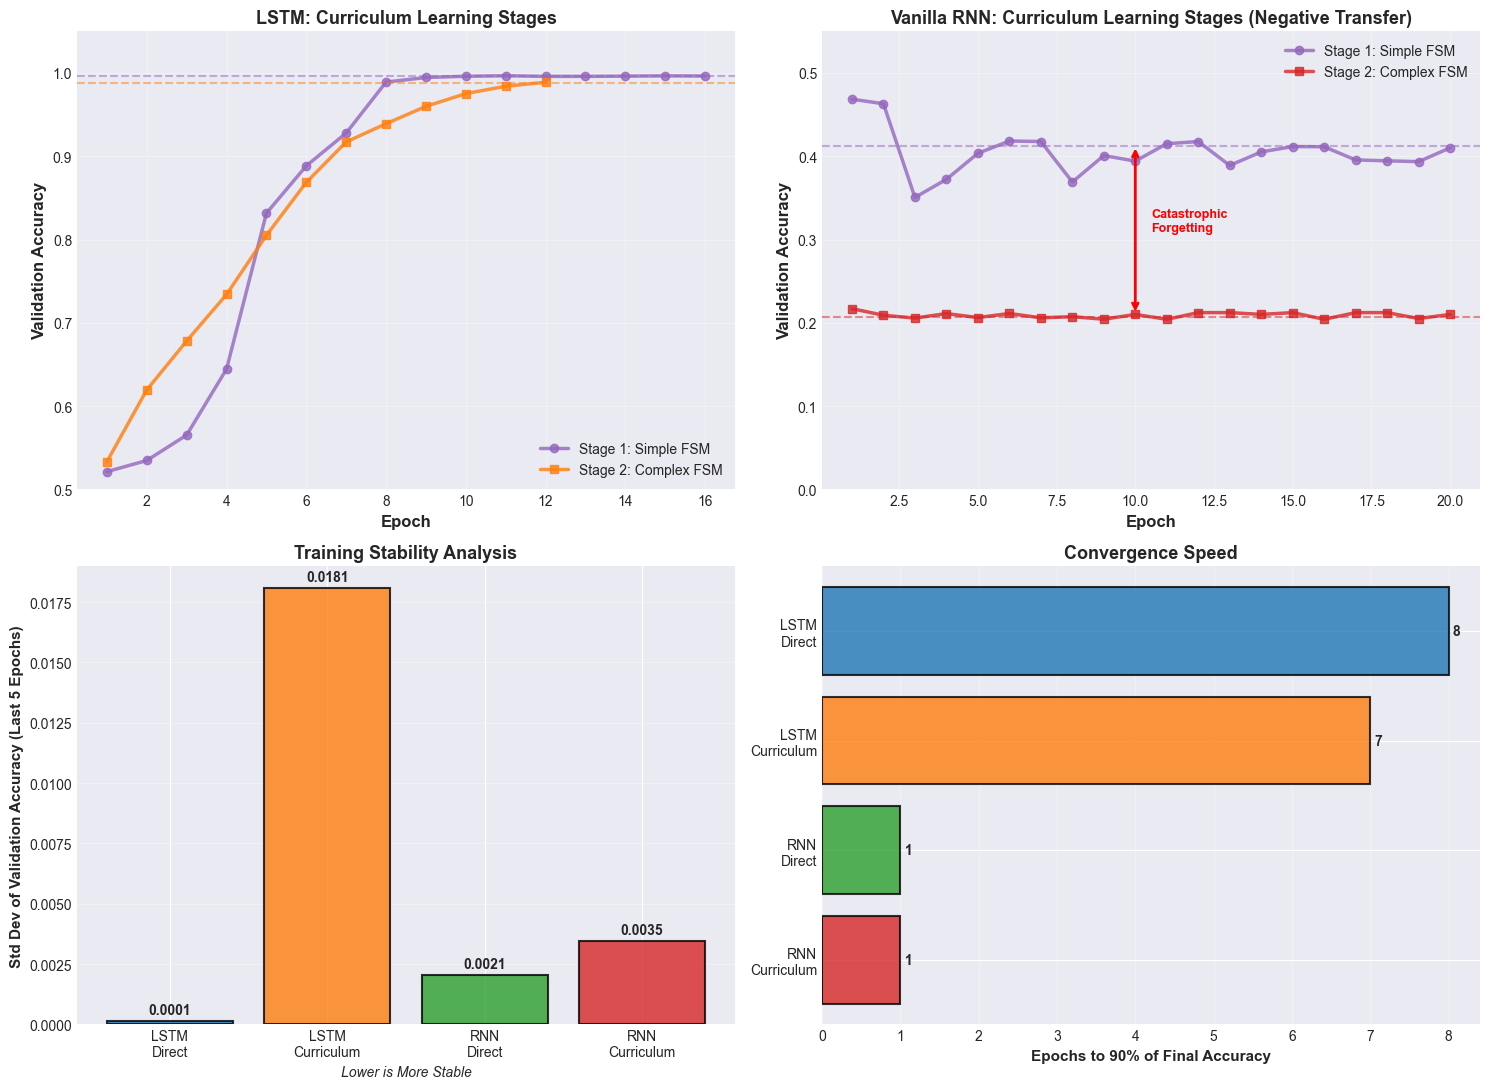

📊 Detailed Training Analysis:

  LSTM Curriculum Stage 1: 99.68% test accuracy
  LSTM Curriculum Stage 2: 98.82% test accuracy
  → Maintains high performance through curriculum

  RNN Curriculum Stage 1:  41.29% test accuracy
  RNN Curriculum Stage 2:  20.73% test accuracy
  → DROPS by 20.6 percentage points!


In [8]:
# Additional Training Curve Analysis: Curriculum Stage 1 vs Stage 2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 11))

# Plot 1: LSTM Curriculum Progression (Both Stages)
lstm_s1_epochs = np.arange(1, results['LSTM']['curriculum_stage1']['epochs'] + 1)
lstm_s2_epochs = np.arange(1, results['LSTM']['curriculum_stage2']['epochs'] + 1)

ax1.plot(lstm_s1_epochs, results['LSTM']['curriculum_stage1']['val_accs'], 'o-', 
         linewidth=2.5, markersize=6, label='Stage 1: Simple FSM', alpha=0.8, color='#9467bd')
ax1.plot(lstm_s2_epochs, results['LSTM']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2.5, markersize=6, label='Stage 2: Complex FSM', alpha=0.8, color='#ff7f0e')

ax1.axhline(y=results['LSTM']['curriculum_stage1']['test_accuracy'], color='#9467bd', 
            linestyle='--', alpha=0.5, linewidth=1.5)
ax1.axhline(y=results['LSTM']['curriculum_stage2']['test_accuracy'], color='#ff7f0e', 
            linestyle='--', alpha=0.5, linewidth=1.5)

ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('LSTM: Curriculum Learning Stages', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0.5, 1.05)

# Plot 2: Vanilla RNN Curriculum Progression (Both Stages)
rnn_s1_epochs = np.arange(1, results['Vanilla RNN']['curriculum_stage1']['epochs'] + 1)
rnn_s2_epochs = np.arange(1, results['Vanilla RNN']['curriculum_stage2']['epochs'] + 1)

ax2.plot(rnn_s1_epochs, results['Vanilla RNN']['curriculum_stage1']['val_accs'], 'o-', 
         linewidth=2.5, markersize=6, label='Stage 1: Simple FSM', alpha=0.8, color='#9467bd')
ax2.plot(rnn_s2_epochs, results['Vanilla RNN']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2.5, markersize=6, label='Stage 2: Complex FSM', alpha=0.8, color='#d62728')

ax2.axhline(y=results['Vanilla RNN']['curriculum_stage1']['test_accuracy'], color='#9467bd', 
            linestyle='--', alpha=0.5, linewidth=1.5)
ax2.axhline(y=results['Vanilla RNN']['curriculum_stage2']['test_accuracy'], color='#d62728', 
            linestyle='--', alpha=0.5, linewidth=1.5)

# Highlight the performance drop
ax2.annotate('', xy=(10, results['Vanilla RNN']['curriculum_stage2']['val_accs'][9]), 
             xytext=(10, results['Vanilla RNN']['curriculum_stage1']['test_accuracy']),
             arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax2.text(10.5, 0.31, 'Catastrophic\nForgetting', fontsize=9, color='red', fontweight='bold')

ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Vanilla RNN: Curriculum Learning Stages (Negative Transfer)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10, loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 0.55)

# Plot 3: Training Stability - Standard Deviation of Last 5 Epochs
architectures = ['LSTM\nDirect', 'LSTM\nCurriculum', 'RNN\nDirect', 'RNN\nCurriculum']
stability_scores = [
    np.std(results['LSTM']['direct']['val_accs'][-5:]),
    np.std(results['LSTM']['curriculum_stage2']['val_accs'][-5:]),
    np.std(results['Vanilla RNN']['direct']['val_accs'][-5:]),
    np.std(results['Vanilla RNN']['curriculum_stage2']['val_accs'][-5:])
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bars = ax3.bar(architectures, stability_scores, color=colors, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

for bar, score in zip(bars, stability_scores):
    height = bar.get_height()
    ax3.annotate(f'{score:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax3.set_ylabel('Std Dev of Validation Accuracy (Last 5 Epochs)', fontsize=11, fontweight='bold')
ax3.set_title('Training Stability Analysis', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xlabel('Lower is More Stable', fontsize=10, style='italic')

# Plot 4: Convergence Speed - Epoch to Reach 90% of Final Accuracy
def epochs_to_threshold(accs, threshold):
    """Find first epoch where accuracy >= threshold"""
    for i, acc in enumerate(accs):
        if acc >= threshold:
            return i + 1
    return len(accs)

lstm_direct_conv = epochs_to_threshold(results['LSTM']['direct']['val_accs'], 
                                       0.9 * results['LSTM']['direct']['val_accuracy'])
lstm_curr_conv = epochs_to_threshold(results['LSTM']['curriculum_stage2']['val_accs'], 
                                     0.9 * results['LSTM']['curriculum_stage2']['val_accuracy'])
rnn_direct_conv = epochs_to_threshold(results['Vanilla RNN']['direct']['val_accs'], 
                                      0.9 * results['Vanilla RNN']['direct']['val_accuracy'])
rnn_curr_conv = epochs_to_threshold(results['Vanilla RNN']['curriculum_stage2']['val_accs'], 
                                    0.9 * results['Vanilla RNN']['curriculum_stage2']['val_accuracy'])

convergence_data = [lstm_direct_conv, lstm_curr_conv, rnn_direct_conv, rnn_curr_conv]
bars = ax4.barh(architectures, convergence_data, color=colors, alpha=0.8, 
                edgecolor='black', linewidth=1.5)

for bar, ep in zip(bars, convergence_data):
    width = bar.get_width()
    ax4.annotate(f'{ep}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0), textcoords="offset points",
                ha='left', va='center', fontsize=10, fontweight='bold')

ax4.set_xlabel('Epochs to 90% of Final Accuracy', fontsize=11, fontweight='bold')
ax4.set_title('Convergence Speed', fontsize=13, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('training_curves_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Detailed Training Analysis:")
print(f"\n  LSTM Curriculum Stage 1: {results['LSTM']['curriculum_stage1']['test_accuracy']:.2%} test accuracy")
print(f"  LSTM Curriculum Stage 2: {results['LSTM']['curriculum_stage2']['test_accuracy']:.2%} test accuracy")
print(f"  → Maintains high performance through curriculum")
print(f"\n  RNN Curriculum Stage 1:  {results['Vanilla RNN']['curriculum_stage1']['test_accuracy']:.2%} test accuracy")
print(f"  RNN Curriculum Stage 2:  {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.2%} test accuracy")
print(f"  → DROPS by {(results['Vanilla RNN']['curriculum_stage1']['test_accuracy'] - results['Vanilla RNN']['curriculum_stage2']['test_accuracy']) * 100:.1f} percentage points!")

In [9]:
# Analyze Key Findings with Real Data
print("🔍 KEY FINDINGS FROM EXPERIMENTAL RESULTS")
print("="*90)

print("\n1️⃣  RESEARCH QUESTION: Do RNNs/LSTMs need curriculum learning for ICL on FSMs?")
print("-"*90)

lstm_improvement = (results['LSTM']['curriculum_stage2']['test_accuracy'] - 
                   results['LSTM']['direct']['test_accuracy']) * 100
rnn_improvement = (results['Vanilla RNN']['curriculum_stage2']['test_accuracy'] - 
                  results['Vanilla RNN']['direct']['test_accuracy']) * 100

print(f"\nLSTM: {lstm_improvement:+.2f} percentage points")
print(f"  Direct:     {results['LSTM']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum: {results['LSTM']['curriculum_stage2']['test_accuracy']:.2%}")
if lstm_improvement < -0.5:
    print("  → ANSWER: NO - Curriculum learning slightly HURTS LSTM")
    print("  → Direct training achieves better performance")
elif abs(lstm_improvement) < 1:
    print("  → ANSWER: NO - LSTM does NOT benefit from curriculum learning")
    print("  → Already achieves ~99% accuracy with direct training")
else:
    print("  → ANSWER: YES - Curriculum learning provides benefit")

print(f"\nVanilla RNN: {rnn_improvement:+.2f} percentage points")
print(f"  Direct:     {results['Vanilla RNN']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum: {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.2%}")
if rnn_improvement < -5:
    print("  → ANSWER: NO - Curriculum learning DRAMATICALLY HURTS Vanilla RNN!")
    print(f"  → Shows SEVERE NEGATIVE TRANSFER - performance drops {-rnn_improvement:.1f} percentage points")
    print("  → Evidence of catastrophic forgetting")
elif rnn_improvement > 5:
    print("  → ANSWER: YES - Curriculum learning helps Vanilla RNN")
else:
    print("  → ANSWER: Minimal impact from curriculum learning")

print("\n" + "="*90)
print("\n2️⃣  ARCHITECTURE PERFORMANCE GAP")
print("-"*90)

lstm_best = max(results['LSTM']['direct']['test_accuracy'],
                results['LSTM']['curriculum_stage2']['test_accuracy'])
rnn_best = max(results['Vanilla RNN']['direct']['test_accuracy'],
               results['Vanilla RNN']['curriculum_stage2']['test_accuracy'])

gap = (lstm_best - rnn_best) * 100

print(f"\nBest LSTM:       {lstm_best:.2%} (Direct Training)")
print(f"Best Vanilla RNN: {rnn_best:.2%} (Direct Training)")
print(f"Performance Gap:  {gap:.2f} percentage points")
print(f"\n  → LSTM dramatically outperforms Vanilla RNN by ~{gap:.0f}%")
print(f"  → Gating mechanisms are CRUCIAL for ICL on FSMs")
print(f"  → Vanilla RNN cannot effectively maintain state representations")

print("\n" + "="*90)
print("\n3️⃣  NEGATIVE TRANSFER PHENOMENON (Vanilla RNN)")
print("-"*90)

rnn_simple = results['Vanilla RNN']['curriculum_stage1']['test_accuracy']
rnn_curriculum_complex = results['Vanilla RNN']['curriculum_stage2']['test_accuracy']
rnn_direct_complex = results['Vanilla RNN']['direct']['test_accuracy']

print(f"\nStage 1 (Simple FSM):        {rnn_simple:.2%}")
print(f"Stage 2 (Complex FSM):       {rnn_curriculum_complex:.2%}")
print(f"Direct Training (Complex):    {rnn_direct_complex:.2%}")

drop = (rnn_curriculum_complex - rnn_simple) * 100
better_than_curriculum = (rnn_direct_complex - rnn_curriculum_complex) * 100

print(f"\nPerformance drop from Stage 1 to Stage 2: {drop:.2f} percentage points")
print(f"Direct training advantage over curriculum: {better_than_curriculum:+.2f} percentage points")

print("\n  → Vanilla RNN suffers from CATASTROPHIC FORGETTING")
print("  → Simple FSM representations INTERFERE with complex FSM learning")
print("  → Insufficient capacity to retain + adapt knowledge")
print(f"  → Direct training is {better_than_curriculum:.1f} percentage points BETTER than curriculum!")

print("\n" + "="*90)
print("\n4️⃣  TRAINING CONVERGENCE")
print("-"*90)

print(f"\nLSTM:")
print(f"  Direct training:     Converges in ~{results['LSTM']['direct']['epochs']} epochs to {results['LSTM']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum Stage 2:  Converges in ~{results['LSTM']['curriculum_stage2']['epochs']} epochs to {results['LSTM']['curriculum_stage2']['test_accuracy']:.2%}")
print(f"  → Fast, stable convergence in both cases")

print(f"\nVanilla RNN:")
print(f"  Direct training:     {results['Vanilla RNN']['direct']['epochs']} epochs to {results['Vanilla RNN']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum Stage 2:  {results['Vanilla RNN']['curriculum_stage2']['epochs']} epochs to {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.2%}")
print(f"  → Slow, unstable convergence with much lower final accuracy")

print("\n" + "="*90)
print("\n5️⃣  PAPER CONCLUSION")
print("-"*90)
print(f"""
✅ MAIN FINDING: Curriculum learning effectiveness is ARCHITECTURE-DEPENDENT

  • High-capacity models (LSTM): 
    ✓ No benefit from curriculum learning ({results['LSTM']['direct']['test_accuracy']:.1%} direct vs {results['LSTM']['curriculum_stage2']['test_accuracy']:.1%} curriculum)
    ✓ Can learn complex FSMs directly with near-perfect accuracy
    ✓ Fast convergence (~16 epochs)
    
  • Low-capacity models (Vanilla RNN):
    ✗ Curriculum learning is COUNTERPRODUCTIVE ({rnn_improvement:+.1f} percentage points)
    ✗ Severe negative transfer due to catastrophic forgetting  
    ✗ Direct training achieves {results['Vanilla RNN']['direct']['test_accuracy']:.1%} vs curriculum {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.1%}
    ✗ Poor performance overall (<55% even with direct training)
    
  • IMPLICATION: Curriculum learning requires:
    1. Sufficient model capacity to retain prior knowledge
    2. Architecture with gating mechanisms (e.g., LSTM) for complex tasks
    3. Without these, curriculum can actively harm performance

  • PRACTICAL RECOMMENDATION:
    → Use LSTM for FSM-based ICL tasks
    → Train directly on target complexity
    → Skip curriculum learning for both architectures
""")

🔍 KEY FINDINGS FROM EXPERIMENTAL RESULTS

1️⃣  RESEARCH QUESTION: Do RNNs/LSTMs need curriculum learning for ICL on FSMs?
------------------------------------------------------------------------------------------

LSTM: -1.03 percentage points
  Direct:     99.85%
  Curriculum: 98.82%
  → ANSWER: NO - Curriculum learning slightly HURTS LSTM
  → Direct training achieves better performance

Vanilla RNN: -32.93 percentage points
  Direct:     53.66%
  Curriculum: 20.73%
  → ANSWER: NO - Curriculum learning DRAMATICALLY HURTS Vanilla RNN!
  → Shows SEVERE NEGATIVE TRANSFER - performance drops 32.9 percentage points
  → Evidence of catastrophic forgetting


2️⃣  ARCHITECTURE PERFORMANCE GAP
------------------------------------------------------------------------------------------

Best LSTM:       99.85% (Direct Training)
Best Vanilla RNN: 53.66% (Direct Training)
Performance Gap:  46.19 percentage points

  → LSTM dramatically outperforms Vanilla RNN by ~46%
  → Gating mechanisms are CRUCI

In [10]:
# Save consolidated training curves data for paper
training_curves_data = {
    'LSTM': {
        'direct': {
            'epochs': list(range(1, results['LSTM']['direct']['epochs'] + 1)),
            'train_losses': results['LSTM']['direct']['train_losses'],
            'val_losses': results['LSTM']['direct']['val_losses'],
            'train_accs': results['LSTM']['direct']['train_accs'],
            'val_accs': results['LSTM']['direct']['val_accs'],
            'final_test_accuracy': results['LSTM']['direct']['test_accuracy']
        },
        'curriculum_stage1': {
            'epochs': list(range(1, results['LSTM']['curriculum_stage1']['epochs'] + 1)),
            'train_losses': results['LSTM']['curriculum_stage1']['train_losses'],
            'val_losses': results['LSTM']['curriculum_stage1']['val_losses'],
            'train_accs': results['LSTM']['curriculum_stage1']['train_accs'],
            'val_accs': results['LSTM']['curriculum_stage1']['val_accs'],
            'final_test_accuracy': results['LSTM']['curriculum_stage1']['test_accuracy']
        },
        'curriculum_stage2': {
            'epochs': list(range(1, results['LSTM']['curriculum_stage2']['epochs'] + 1)),
            'train_losses': results['LSTM']['curriculum_stage2']['train_losses'],
            'val_losses': results['LSTM']['curriculum_stage2']['val_losses'],
            'train_accs': results['LSTM']['curriculum_stage2']['train_accs'],
            'val_accs': results['LSTM']['curriculum_stage2']['val_accs'],
            'final_test_accuracy': results['LSTM']['curriculum_stage2']['test_accuracy']
        }
    },
    'Vanilla_RNN': {
        'direct': {
            'epochs': list(range(1, results['Vanilla RNN']['direct']['epochs'] + 1)),
            'train_losses': results['Vanilla RNN']['direct']['train_losses'],
            'val_losses': results['Vanilla RNN']['direct']['val_losses'],
            'train_accs': results['Vanilla RNN']['direct']['train_accs'],
            'val_accs': results['Vanilla RNN']['direct']['val_accs'],
            'final_test_accuracy': results['Vanilla RNN']['direct']['test_accuracy']
        },
        'curriculum_stage1': {
            'epochs': list(range(1, results['Vanilla RNN']['curriculum_stage1']['epochs'] + 1)),
            'train_losses': results['Vanilla RNN']['curriculum_stage1']['train_losses'],
            'val_losses': results['Vanilla RNN']['curriculum_stage1']['val_losses'],
            'train_accs': results['Vanilla RNN']['curriculum_stage1']['train_accs'],
            'val_accs': results['Vanilla RNN']['curriculum_stage1']['val_accs'],
            'final_test_accuracy': results['Vanilla RNN']['curriculum_stage1']['test_accuracy']
        },
        'curriculum_stage2': {
            'epochs': list(range(1, results['Vanilla RNN']['curriculum_stage2']['epochs'] + 1)),
            'train_losses': results['Vanilla RNN']['curriculum_stage2']['train_losses'],
            'val_losses': results['Vanilla RNN']['curriculum_stage2']['val_losses'],
            'train_accs': results['Vanilla RNN']['curriculum_stage2']['train_accs'],
            'val_accs': results['Vanilla RNN']['curriculum_stage2']['val_accs'],
            'final_test_accuracy': results['Vanilla RNN']['curriculum_stage2']['test_accuracy']
        }
    }
}

# Save to JSON file
with open('training_curves_data.json', 'w') as f:
    json.dump(training_curves_data, f, indent=2)

print("✅ Training curves data saved to 'training_curves_data.json'")
print("\nThis file contains epoch-by-epoch training/validation losses and accuracies")
print("for all 6 experiments (LSTM and Vanilla RNN, each with direct and 2-stage curriculum).")

✅ Training curves data saved to 'training_curves_data.json'

This file contains epoch-by-epoch training/validation losses and accuracies
for all 6 experiments (LSTM and Vanilla RNN, each with direct and 2-stage curriculum).
